In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.util import shuffle_dataset
from common.trainer import Trainer

In [10]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [11]:
# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

In [12]:
# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [14]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [15]:
# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.1 | lr:5.711421804060171e-05, weight decay:1.5670707173938377e-06
val acc:0.06 | lr:2.1778294196424057e-06, weight decay:3.826765774094029e-05
val acc:0.17 | lr:0.0008635266635936379, weight decay:4.726354560271169e-05
val acc:0.13 | lr:0.00012595561692751485, weight decay:3.387206954530082e-05
val acc:0.09 | lr:1.0065123937528196e-06, weight decay:6.017674617016467e-08
val acc:0.22 | lr:0.002422865872621091, weight decay:4.6099397111860484e-07
val acc:0.77 | lr:0.007614525932290578, weight decay:1.4977903571667184e-08
val acc:0.09 | lr:6.927190823499106e-05, weight decay:8.821267769166093e-05
val acc:0.81 | lr:0.009289572967553431, weight decay:1.740763692341469e-06
val acc:0.14 | lr:5.070632784541754e-05, weight decay:2.2518301898026313e-05
val acc:0.11 | lr:2.9114894612501052e-05, weight decay:3.092500719429554e-07
val acc:0.11 | lr:3.36379387408178e-05, weight decay:2.26904468583445e-06
val acc:0.05 | lr:2.1345020029358748e-06, weight decay:1.3904762691672321e-05
val acc:

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.81) | lr:0.009289572967553431, weight decay:1.740763692341469e-06
Best-2(val acc:0.77) | lr:0.007614525932290578, weight decay:1.4977903571667184e-08
Best-3(val acc:0.77) | lr:0.009784690520533167, weight decay:4.279710156191453e-06
Best-4(val acc:0.76) | lr:0.0098758642485949, weight decay:4.452301939546693e-08
Best-5(val acc:0.76) | lr:0.00872850714645355, weight decay:1.2386460125763146e-07
Best-6(val acc:0.65) | lr:0.006092020976781348, weight decay:4.971787798768427e-05
Best-7(val acc:0.63) | lr:0.005820022372052608, weight decay:5.28573157921368e-07
Best-8(val acc:0.57) | lr:0.006378288872148663, weight decay:9.749680787703323e-08
Best-9(val acc:0.55) | lr:0.004692012035862498, weight decay:4.933629704785935e-06
Best-10(val acc:0.52) | lr:0.003617784662602995, weight decay:3.2318347107621633e-06
Best-11(val acc:0.51) | lr:0.0037115560027983, weight decay:7.435959648498031e-08
Best-12(val acc:0.44) | lr:0

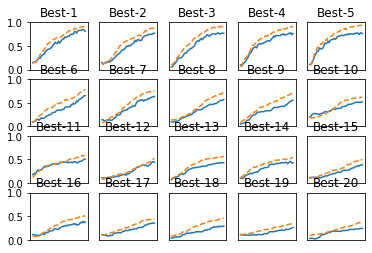

In [16]:
# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

#精度が高い順に並べる
#val_acc_listの最後の要素＝精度をlambda式で返してソートを行う、reverse=Trueで降順（高いから低い精度順）に並べる
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    #行列方向に何枚図を並べるか決め、何番目に描画するか示す
    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    #5枚に一つだけy軸のメモリをつける
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()